<a href="https://colab.research.google.com/github/bala-codes/URL-CATEGORY-CLASSIFIER-USING-MACHINE-LEARNING-NLP/blob/master/codes/2.%20URL%20Category%20Classifier%20Single%20Input%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/nb_classifier.pkl", "rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/svc_classifier.pkl", "rb") as fin:
  vectorizer, svc_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/pac_classifier.pkl", "rb") as fin:
  vectorizer, pac_classifier = pickle.load(fin)
  
with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/logreg_classifier.pkl", "rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/bb_classifier.pkl", "rb") as fin:
  vectorizer, bb_classifier = pickle.load(fin)
  
print("SUCCESS ALL MODELS LOADED")

SUCCESS ALL MODELS LOADED


In [ ]:
# Required Functions to predict the News

output = int()
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)
  class_labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science']
  value = class_labels[output[0]]

  j = [graph[0][0],graph[0][1],graph[0][2],graph[0][3],graph[0][4],graph[0][5],graph[0][6],graph[0][7],graph[0][8],graph[0][9],graph[0][10]]
  y_pos = np.arange(len(class_labels))
  plt.figure(figsize=(10,5))
  plt.barh(y_pos,j,color='blue',alpha=0.5)
  plt.yticks(y_pos,class_labels)
  print()
  plt.title("PREDICTION FOR URL's")
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN NEWS URL IS RELATED TO ' + start + str(value) + end)

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier._predict_proba_lr(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = bb_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  print(test_pred_prob)
  return test_pred_prob,pred


# GIVE YOUR INPUT HERE

ENTER THE URL HERE : https://www.programcreek.com/python/example/102353/matplotlib.pyplot.barh
[[0.01111627 0.17681363 0.60106975 0.02022118 0.02687499 0.02540401
  0.0225323  0.03296699 0.01918852 0.04247853 0.02133383]]



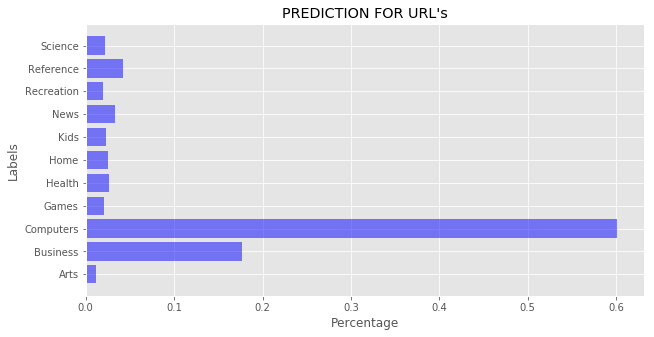


THE GIVEN NEWS URL IS RELATED TO Computers


In [ ]:
#String input
x = input("ENTER THE URL HERE : ") 
x=[x,]
prediction(x)